<a href="https://colab.research.google.com/github/AditiBhattacharya11/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing the libraries for analysing the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import date

In [7]:
# mounting drive to the collaboratory
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
#accessing/reading the hotel booking dataset
hoteldf1=pd.read_csv("/content/drive/MyDrive/Hotel Bookings.csv")

In [10]:
#printing the dataframe
hoteldf1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07



After loading the dataset we can see a number of things. These 32 columns provide a very rich amount of information for deep data exploration we can do on this dataset. We can also see some missing values, which will require cleaning and handling of NaN values.

Description of Columns
1.hotel : Has 2 values (Resort Hotel or City Hotel)

2.is_canceled : Has 2 values namely 0 meaning booking was canceled and 1 meaning booking was not canceled

3.lead_time : The number of days between the time a guest books their room and the time they are scheduled to arrive at the hotel.

4.arrival_date_year : Year of arrival date

5.arrival_date_month : Month of arrival date

6.arrival_date_week_number : Week number of year on which the customer arrived

7.arrival_date_day_of_month : Date of the month on which the customer arrived

8.stays_in_weekend_nights : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

9.stays_in_week_nights : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

10.adults : Number of adults

11.children : Number of children

12.babies : Number of babies

13.meal : Type of meal booked by the customer. SC means self-catering (no meals are included). BB means bed and breakfast. HB means half board, in which breakfast and dinner are included. FB means full board, in which breakfast, lunch and dinner are included

14.country : customer's country.

15.market_segment : Market segment designation. In column, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

16.distribution_channel : Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

17.is_repeated_guest : Value indicating if the booking name was from a repeated guest (1) or not (0)

18.previous_cancellations : Number of previous bookings that were cancelled by the customer prior to the current booking

19.previous_bookings_not_canceled : Number of previous bookings not cancelled by the customer prior to the current booking

20.reserved_room_type : Room reserved by the customer.

21.assigned_room_type : Room assigned to the customer.

22.booking_changes : Number of changes/amendments made to the booking from the moment the booking was entered, until the moment of check-in or cancellation

23.deposit_type : Indicating if the customer made a deposit to guarantee the booking.

24.agent : ID of the travel agent or agency that made the booking

25.company : ID of the company/entity that made the booking or responsible for paying the booking.

26.days_in_waiting_list : Number of days the booking was in the waiting list before it was confirmed to the customer

27.customer_type : Type of customer, “Transient guest” means a person who occupies a room in a hotel, motel or tourist court for less than thirty (30) consecutive days.

28.adr : Average Daily Rate paid or supposed to be paid by the customer

29.required_car_parking_spaces : Number of car parking spaces required by the customer

30.total_of_special_requests :Number of special requests made by the customer (e.g. twin bed or high floor)

31.reservation_status : Shows Reservation status of the customer, assuming one of three categories:

Canceled – booking was canceled by the customer

Check-Out – customer has checked out

No-Show – customer did not check-in and did inform the hotel of the reason why

32.reservation_status_date : Date at which the last status was set. This variable can be used in conjunction with the Reservation_status to understand when was the booking canceled or when did the customer checked-out of the hote

Understanding, Wrangling and Cleaning Data
Presenting the code and methods for acquiring the data. Loading the data into appropriate format for analysis.Side by side, explaining the process and results

After looking at the dataset we were able to notice some NaN values, therefore we need to examine missing values further before continuing with analysis

#finding out first which columns have null values
#using 'sum' function will show us how many nulls are found in each column of the dataset

In [11]:
hoteldf1.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In this dataset, there are not too many columns with null(NaN) values, as we can see that children column has only 4 null values which we can replace with 0 because it's quite natural that those people didn't bring any child with them. And we can also see that country, agent and company have null values but these columns can not be dropped as we need these columns for our analysis. Instead, the null countries can be replaced with a string 'unknown'.

In [12]:
#replacing the null values in children column with 0
hoteldf1.fillna({'children':0},inplace=True)

In [13]:
#replacing null countries with 'unknown'
hoteldf1.fillna({'country':'unknown'},inplace=True)

In [14]:
#checking again for null values
hoteldf1.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

There is a column on 1st index whose name is is_canceled which has only 2 values 0 meaning the booking is not cancelled and 1 meaning the booking is cancelled.

In [15]:
#checking how many bookings are cancelled and how many are not cancelled
hoteldf1['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

As we can see that 44224 bookings are cancelled, so we will not be using these 44224 rows for our analysis. Only not cancelled rows will be used for analysis

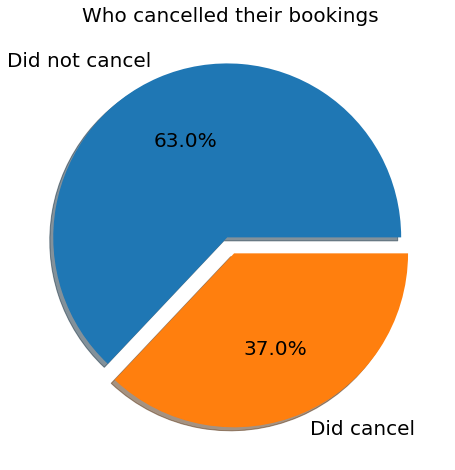

In [16]:
#showing cancelled and not cancelled bookings through a piechart
hoteldf1['is_canceled'].value_counts().rename({0:'Did not cancel',1:'Did cancel'}).plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20)
plt.title('Who cancelled their bookings',fontsize=20)
plt.xlabel('')
plt.ylabel('')
plt.show()

In [17]:
#viewing the values in adults columns and its values
hoteldf1['adults'].value_counts()

2     89680
1     23027
3      6202
0       403
4        62
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: adults, dtype: int64

In [18]:
#checking the rows where adults are 0
hoteldf1[hoteldf1['adults']==0][['adults','children','babies']]

,adults,children,babies
2224,0,0.0,0
2409,0,0.0,0
3181,0,0.0,0
3684,0,0.0,0
3708,0,0.0,0
...,...,...,...
117204,0,2.0,0
117274,0,2.0,0
117303,0,2.0,0
117453,0,2.0,0


As we can see in some rows adults and children are 0. This doesn't make any sence as the dataset we have above has each customer as a row, so these rows with 0 adults and 0 children must be dropped

In [19]:
#creating a new column to store total members 
hoteldf1['total_members']=hoteldf1['adults'] + hoteldf1['children'] 

As our data cleaning comes to an end we will only be working on those rows where bookings are not cancelled and country is not unknown and total members are not equal to 0.

In [20]:
#obtaining a new dataframe which has cleaned data
hoteldf=hoteldf1[(hoteldf1['is_canceled']==0) & (hoteldf1['country'] != 'unknown') & (hoteldf1['total_members']!=0)]  

In [21]:
#checking the dataframe before starting analysis
hoteldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74590 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           74590 non-null  object 
 1   is_canceled                     74590 non-null  int64  
 2   lead_time                       74590 non-null  int64  
 3   arrival_date_year               74590 non-null  int64  
 4   arrival_date_month              74590 non-null  object 
 5   arrival_date_week_number        74590 non-null  int64  
 6   arrival_date_day_of_month       74590 non-null  int64  
 7   stays_in_weekend_nights         74590 non-null  int64  
 8   stays_in_week_nights            74590 non-null  int64  
 9   adults                          74590 non-null  int64  
 10  children                        74590 non-null  float64
 11  babies                          74590 non-null  int64  
 12  meal                           

In [22]:
#viewing first 5 rows of the dataset on which we will be performing EDA 
hoteldf.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_members
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0


In [23]:
#viewing last 5 rows of the dataset on which we will be performing EDA 
hoteldf.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_members
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,2.0
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,3.0
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,2.0
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,2.0
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07,2.0


This question has two aspects-
i) From customer's point of view-

From customers point of view the best time to book a hotel room is when it is the cheapest i.e during off seasons, when not too many people book hotel rooms.

ii)From hotel's point of view-

From hotel's point of view the best time to book the hotel is during onn seasons i.e when too many people are booking rooms and the demand for rooms is high, at that time the hotel can charge high prices from customers, beacause the supply is same but the demand is relatively high.



In [24]:
#making a new column for month number
def month_number(month):
  if month=='January':
    return 1
  elif month=='February':
    return 2
  elif month=='March':
    return 3
  elif month=='April':
    return 4
  elif month=='May':
    return 5
  elif month=='June':
    return 6
  elif month=='July':
    return 7
  elif month=='August':
    return 8         
  elif month=='September':
    return 9
  elif month=='October':
    return 10
  elif month=='November':
    return 11     
  else:
    return 12  
hoteldf['month_number']=hoteldf['arrival_date_month'].apply(month_number)    

<ipython-input-24-e003a909e046>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hoteldf['month_number']=hoteldf['arrival_date_month'].apply(month_number)


In [25]:
#getting per month hotel bookings for each year
per_month_booking_for_each_year=hoteldf.groupby('arrival_date_year')['month_number'].value_counts().unstack().fillna(0)

In [26]:
#viewing per month booking for each year
per_month_booking_for_each_year

month_number,1,2,3,4,5,6,7,8,9,10,11,12
arrival_date_year,,,,,,,,,,,,
2015,0.0,0.0,0.0,0.0,0.0,0.0,1502.0,2273.0,3002.0,3197.0,1831.0,1920.0
2016,1658.0,2516.0,3307.0,3343.0,3548.0,3183.0,3052.0,3222.0,3358.0,3657.0,2780.0,2427.0
2017,2403.0,2788.0,3259.0,3185.0,3543.0,3201.0,3326.0,3109.0,0.0,0.0,0.0,0.0


In [27]:
#storing the 2015 bookings in 2015's dataset
bookings_in2015=per_month_booking_for_each_year.iloc[0]

In [28]:
#viewing 2015's dataset
bookings_in2015

month_number
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7     1502.0
8     2273.0
9     3002.0
10    3197.0
11    1831.0
12    1920.0
Name: 2015, dtype: float64

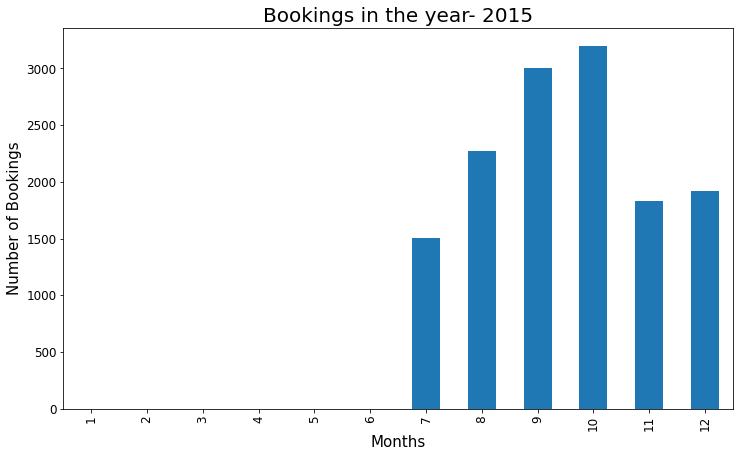

In [29]:
#plotting 2015's dataset on a bar graph
plt.figure(figsize=(12,7))
bookings_in2015.plot(kind='bar',fontsize=12)
plt.title('Bookings in the year- 2015',fontsize=20)
plt.xlabel('Months',fontsize=15)
plt.ylabel('Number of Bookings',fontsize=15)
plt.show()

Trends in 2017-
As we can see in 2017 there are no/less bookings after 8th month i.e August. So,

i)From customer's point of view-

The best time to book hotel room in 2017 is after August because there is not a single booking trafic after August compare to rest of the months of year 2017, which ultimately will give customer high probability to get discounted rates on hotel rooms.

ii)From hotel's point of view-

The best time to book hotel room in 2017 is till Month of August because till August, graph is denoting high amount of customer engagement which will enable the hotel to charge relatively high price from customers during this period.

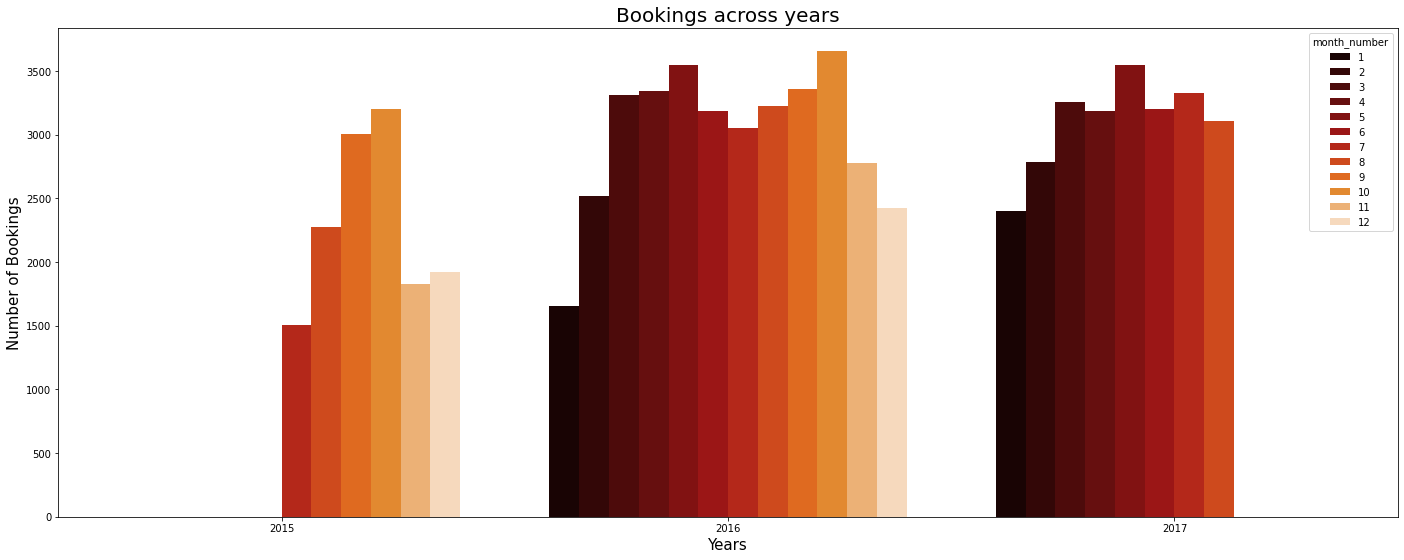

In [31]:
#plotting number of bookings across years
plt.figure(figsize=(24,9))
sns.countplot(x='arrival_date_year',data=hoteldf,hue='month_number',palette='gist_heat')
plt.title('Bookings across years',fontsize=20)
plt.xlabel('Years',fontsize=15)
plt.ylabel('Number of Bookings',fontsize=15)
plt.show()

In order to determine the length of stay for getting the best daily rate i.e lowest adr(average daily rate). We need to compare the total nights stayed and adr with each other.